In [6]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
weather = pd.read_csv("3588842.csv", index_col= "DATE")

In [9]:
weather

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",7.61,1358.0,1358.0,0.00,0.0,0.0,43.0,50,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",6.93,2221.0,2242.0,0.00,0.0,0.0,51.0,60,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",8.50,738.0,702.0,0.00,0.0,0.0,55.0,63,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",10.96,1840.0,1839.0,0.71,0.0,0.0,52.0,59,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",17.45,824.0,823.0,0.00,0.0,0.0,39.0,48,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,USW00014732,"LAGUARDIA AIRPORT, NY US",6.04,NaN,NaN,0.07,0.0,0.0,39.0,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-25,USW00014732,"LAGUARDIA AIRPORT, NY US",6.49,NaN,NaN,0.22,0.0,0.0,49.0,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-26,USW00014732,"LAGUARDIA AIRPORT, NY US",9.62,NaN,NaN,0.21,0.0,0.0,43.0,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
null_pct=weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
AWND       0.000341
FMTM       0.512850
PGTM       0.530248
PRCP       0.000000
SNOW       0.000000
SNWD       0.000114
TAVG       0.319081
TMAX       0.000000
TMIN       0.000000
TSUN       0.994087
WDF2       0.000114
WDF5       0.001251
WESD       0.543098
WSF2       0.000114
WSF5       0.001251
WT01       0.701046
WT02       0.968729
WT03       0.924608
WT04       0.984876
WT05       0.959859
WT06       0.992950
WT07       0.988856
WT08       0.844439
WT09       0.994769
WT11       0.998522
WT13       0.835797
WT14       0.958381
WT15       0.998522
WT16       0.770753
WT17       0.997726
WT18       0.958494
WT19       0.998977
WT21       0.999886
WT22       0.995224
WV20       0.999886
dtype: float64

In [12]:
cleaner_columns = weather.columns[null_pct<.05]

In [13]:
cleaner_columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN',
       'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [14]:
weather = weather[cleaner_columns].copy()

In [15]:
weather.columns = weather.columns.str.lower()

In [16]:
weather = weather.ffill()

In [17]:
weather.apply(pd.isnull).sum()

station    0
name       0
awnd       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
wdf2       0
wdf5       0
wsf2       0
wsf5       0
dtype: int64

In [18]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
awnd       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
wdf2       0
wdf5       0
wsf2       0
wsf5       0
dtype: int64

In [19]:
weather.dtypes

station     object
name        object
awnd       float64
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
wdf2       float64
wdf5       float64
wsf2       float64
wsf5       float64
dtype: object

In [20]:
weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
       '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28'],
      dtype='object', name='DATE', length=8794)

In [21]:
weather.index = pd.to_datetime(weather.index)

In [22]:
weather.index.year

Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=8794)

In [23]:
weather.index.year.value_counts().sort_index()

DATE
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024     28
Name: count, dtype: int64

<Axes: xlabel='DATE'>

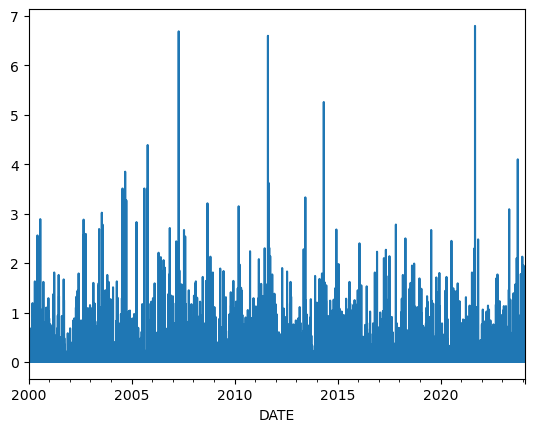

In [24]:
weather["prcp"].plot()

In [25]:
weather["target"] = weather.shift(-1)["tmax"]

In [26]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,,,
2000-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",7.61,0.00,0.0,0.0,50,35,210.0,200.0,16.1,19.9,60.0
2000-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",6.93,0.00,0.0,0.0,60,41,230.0,220.0,17.9,23.0,63.0
2000-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",8.50,0.00,0.0,0.0,63,47,260.0,240.0,17.9,21.9,59.0
2000-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",10.96,0.71,0.0,0.0,59,45,310.0,310.0,21.9,25.1,48.0
2000-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",17.45,0.00,0.0,0.0,48,30,310.0,310.0,32.0,40.9,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,USW00014732,"LAGUARDIA AIRPORT, NY US",6.04,0.07,0.0,0.0,44,37,50.0,60.0,10.1,16.1,57.0
2024-01-25,USW00014732,"LAGUARDIA AIRPORT, NY US",6.49,0.22,0.0,0.0,57,41,50.0,230.0,18.1,21.9,45.0
2024-01-26,USW00014732,"LAGUARDIA AIRPORT, NY US",9.62,0.21,0.0,0.0,45,40,40.0,60.0,19.9,25.9,47.0


In [28]:
weather = weather.ffill()

In [29]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,,,
2000-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",7.61,0.00,0.0,0.0,50,35,210.0,200.0,16.1,19.9,60.0
2000-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",6.93,0.00,0.0,0.0,60,41,230.0,220.0,17.9,23.0,63.0
2000-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",8.50,0.00,0.0,0.0,63,47,260.0,240.0,17.9,21.9,59.0
2000-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",10.96,0.71,0.0,0.0,59,45,310.0,310.0,21.9,25.1,48.0
2000-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",17.45,0.00,0.0,0.0,48,30,310.0,310.0,32.0,40.9,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,USW00014732,"LAGUARDIA AIRPORT, NY US",6.04,0.07,0.0,0.0,44,37,50.0,60.0,10.1,16.1,57.0
2024-01-25,USW00014732,"LAGUARDIA AIRPORT, NY US",6.49,0.22,0.0,0.0,57,41,50.0,230.0,18.1,21.9,45.0
2024-01-26,USW00014732,"LAGUARDIA AIRPORT, NY US",9.62,0.21,0.0,0.0,45,40,40.0,60.0,19.9,25.9,47.0


In [30]:
from sklearn.linear_model import Ridge
rr= Ridge(alpha = .1)

In [35]:
predictors=weather.columns[~weather.columns.isin(["target","name","station","wdf2","wdf5","wsf2","wsf5","awnd"])]

In [36]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [38]:
def backtest(weather,model,predictors,start=3650,step=90):
    predictions=[]
    for i in range(start, weather.shape[0],step):
        train=weather.iloc[:i,:]
        test=weather.iloc[i:(i+step),:]
        model.fit(train[predictors],train["target"])
        preds=model.predict(test[predictors])
        preds=pd.Series(preds,index=test.index)
        combined=pd.concat([test["target"],preds],axis=1)
        combined.columns=["actual","prediction"]
        combined["diff"]=(combined["prediction"]-combined["actual"]).abs()
        predictions.append(combined)
    return pd.concat(predictions)

In [39]:
predictions= backtest(weather,rr,predictors)

In [40]:
predictions

,actual,prediction,diff
DATE,,,
2009-12-29,33.0,31.621913,1.378087
2009-12-30,34.0,33.577077,0.422923
2009-12-31,39.0,39.298958,0.298958
2010-01-01,32.0,43.121723,11.121723
2010-01-02,23.0,32.058306,9.058306
...,...,...,...
2024-01-24,57.0,48.101711,8.898289
2024-01-25,45.0,55.694865,10.694865
2024-01-26,47.0,49.996100,2.996100


In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"],predictions["prediction"])

5.5164791367388695

In [43]:
def acc(old,new):
    return (new-old)/old
def rollacc(weather,horizen,col):
    label=f"rolling_{horizon}_{col}"
    weather[label]=weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"]=acc(weather[label],weather[col])
    return weather
rolling_horizons=[3,14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather=rollacc(weather,horizon,col)
                    

In [44]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",7.61,0.00,0.0,0.0,50,35,210.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",6.93,0.00,0.0,0.0,60,41,230.0,220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",8.50,0.00,0.0,0.0,63,47,260.0,240.0,...,41.000000,0.146341,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",10.96,0.71,0.0,0.0,59,45,310.0,310.0,...,44.333333,0.015038,0.236667,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",17.45,0.00,0.0,0.0,48,30,310.0,310.0,...,40.666667,-0.262295,0.236667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,USW00014732,"LAGUARDIA AIRPORT, NY US",6.04,0.07,0.0,0.0,44,37,50.0,60.0,...,32.666667,0.132653,0.033333,1.100000,38.357143,0.147114,28.642857,0.291771,0.113571,-0.383648
2024-01-25,USW00014732,"LAGUARDIA AIRPORT, NY US",6.49,0.22,0.0,0.0,57,41,50.0,230.0,...,37.666667,0.088496,0.106667,1.062500,39.142857,0.456204,28.571429,0.435000,0.129286,0.701657
2024-01-26,USW00014732,"LAGUARDIA AIRPORT, NY US",9.62,0.21,0.0,0.0,45,40,40.0,60.0,...,39.333333,0.016949,0.166667,0.260000,38.785714,0.160221,28.428571,0.407035,0.140000,0.500000


In [46]:
weather = weather.iloc[14:,:]

In [47]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-15,USW00014732,"LAGUARDIA AIRPORT, NY US",9.17,0.00,0.0,0.0,30,18,290.0,330.0,...,17.333333,0.038462,0.006667,-1.000000,47.428571,-0.367470,33.714286,-0.466102,0.101429,-1.000000
2000-01-16,USW00014732,"LAGUARDIA AIRPORT, NY US",18.79,0.00,0.0,0.0,47,23,300.0,320.0,...,18.666667,0.232143,0.000000,NaN,46.500000,0.010753,32.428571,-0.290749,0.101429,-1.000000
2000-01-17,USW00014732,"LAGUARDIA AIRPORT, NY US",24.61,0.00,0.0,0.0,23,8,310.0,280.0,...,16.333333,-0.510204,0.000000,NaN,43.642857,-0.472995,29.642857,-0.730120,0.101429,-1.000000
2000-01-18,USW00014732,"LAGUARDIA AIRPORT, NY US",11.41,0.00,0.0,0.0,20,5,330.0,40.0,...,12.000000,-0.583333,0.000000,NaN,40.857143,-0.510490,26.785714,-0.813333,0.050714,-1.000000
2000-01-19,USW00014732,"LAGUARDIA AIRPORT, NY US",9.17,0.00,0.0,0.0,30,11,310.0,310.0,...,8.000000,0.375000,0.000000,NaN,39.571429,-0.241877,25.428571,-0.567416,0.050714,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,USW00014732,"LAGUARDIA AIRPORT, NY US",6.04,0.07,0.0,0.0,44,37,50.0,60.0,...,32.666667,0.132653,0.033333,1.100000,38.357143,0.147114,28.642857,0.291771,0.113571,-0.383648
2024-01-25,USW00014732,"LAGUARDIA AIRPORT, NY US",6.49,0.22,0.0,0.0,57,41,50.0,230.0,...,37.666667,0.088496,0.106667,1.062500,39.142857,0.456204,28.571429,0.435000,0.129286,0.701657
2024-01-26,USW00014732,"LAGUARDIA AIRPORT, NY US",9.62,0.21,0.0,0.0,45,40,40.0,60.0,...,39.333333,0.016949,0.166667,0.260000,38.785714,0.160221,28.428571,0.407035,0.140000,0.500000


In [48]:
weather=weather.fillna(0)

In [52]:
def expand(df):
    return df.expanding(1).mean()
for col in ["tmax","tmin","prcp"]:
    weather[f"month_avg_{col}"]=weather[col].groupby(weather.index.month,group_keys=False).apply(expand)
    weather[f"day_avg_{col}"]=weather[col].groupby(weather.index.day_of_year,group_keys=False).apply(expand)

In [53]:
  weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,month_avg_tmin,month_avg_prcp,day_avg_tmax,day_avg_tmin,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-15,USW00014732,"LAGUARDIA AIRPORT, NY US",9.17,0.00,0.0,0.0,30,18,290.0,330.0,...,33.714286,-0.466102,0.101429,-1.000000,30.000000,18.000000,0.000000,30.00,18.00,0.0000
2000-01-16,USW00014732,"LAGUARDIA AIRPORT, NY US",18.79,0.00,0.0,0.0,47,23,300.0,320.0,...,32.428571,-0.290749,0.101429,-1.000000,38.500000,20.500000,0.000000,47.00,23.00,0.0000
2000-01-17,USW00014732,"LAGUARDIA AIRPORT, NY US",24.61,0.00,0.0,0.0,23,8,310.0,280.0,...,29.642857,-0.730120,0.101429,-1.000000,33.333333,16.333333,0.000000,23.00,8.00,0.0000
2000-01-18,USW00014732,"LAGUARDIA AIRPORT, NY US",11.41,0.00,0.0,0.0,20,5,330.0,40.0,...,26.785714,-0.813333,0.050714,-1.000000,30.000000,13.500000,0.000000,20.00,5.00,0.0000
2000-01-19,USW00014732,"LAGUARDIA AIRPORT, NY US",9.17,0.00,0.0,0.0,30,11,310.0,310.0,...,25.428571,-0.567416,0.050714,-1.000000,30.000000,13.000000,0.000000,30.00,11.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,USW00014732,"LAGUARDIA AIRPORT, NY US",6.04,0.07,0.0,0.0,44,37,50.0,60.0,...,28.642857,0.291771,0.113571,-0.383648,40.066313,28.502653,0.101446,39.04,26.80,0.1488
2024-01-25,USW00014732,"LAGUARDIA AIRPORT, NY US",6.49,0.22,0.0,0.0,57,41,50.0,230.0,...,28.571429,0.435000,0.129286,0.701657,40.088742,28.519205,0.101603,39.60,27.76,0.1660
2024-01-26,USW00014732,"LAGUARDIA AIRPORT, NY US",9.62,0.21,0.0,0.0,45,40,40.0,60.0,...,28.428571,0.407035,0.140000,0.500000,40.095238,28.534392,0.101746,37.84,27.72,0.0872


In [54]:
predictors=weather.columns[~weather.columns.isin(["target","name","station"])]

In [55]:
predictors

Index(['awnd', 'prcp', 'snow', 'snwd', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2',
       'wsf5', 'rolling_3_tmax', 'rolling_3_tmax_pct', 'rolling_3_tmin',
       'rolling_3_tmin_pct', 'rolling_3_prcp', 'rolling_3_prcp_pct',
       'rolling_14_tmax', 'rolling_14_tmax_pct', 'rolling_14_tmin',
       'rolling_14_tmin_pct', 'rolling_14_prcp', 'rolling_14_prcp_pct',
       'month_avg_tmax', 'month_avg_tmin', 'month_avg_prcp', 'day_avg_tmax',
       'day_avg_tmin', 'day_avg_prcp'],
      dtype='object')

In [56]:
predictions= backtest(weather,rr,predictors)

In [57]:
mean_absolute_error(predictions["actual"],predictions["prediction"])

4.992311084841569

In [58]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
DATE,,,
2018-04-30,82.0,54.821810,27.178190
2020-03-19,78.0,54.039151,23.960849
2017-02-17,65.0,42.048008,22.951992
2021-05-01,83.0,60.379264,22.620736
2017-04-15,88.0,65.516104,22.483896
...,...,...,...
2013-11-08,50.0,49.994212,0.005788
2017-01-21,50.0,49.994413,0.005587
2012-08-08,89.0,88.997243,0.002757


In [59]:
weather.loc["2017-03-07":"2017-03-17"]

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,month_avg_tmin,month_avg_prcp,day_avg_tmax,day_avg_tmin,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2017-03-07,USW00014732,"LAGUARDIA AIRPORT, NY US",8.50,0.10,0.0,0.0,53,43,170.0,170.0,...,37.642857,0.142315,0.038571,1.592593,50.220974,35.820225,0.121423,48.333333,33.444444,0.043333
2017-03-08,USW00014732,"LAGUARDIA AIRPORT, NY US",12.97,0.06,0.0,0.0,62,49,250.0,310.0,...,38.000000,0.289474,0.042857,0.400000,50.242991,35.844860,0.121308,51.888889,34.833333,0.108333
2017-03-09,USW00014732,"LAGUARDIA AIRPORT, NY US",17.22,0.00,0.0,0.0,65,49,290.0,280.0,...,38.500000,0.272727,0.042857,-1.000000,50.270522,35.869403,0.121082,52.166667,36.388889,0.100000
2017-03-10,USW00014732,"LAGUARDIA AIRPORT, NY US",17.45,0.24,2.4,0.0,49,27,310.0,300.0,...,36.928571,-0.268859,0.060000,3.000000,50.268156,35.852886,0.121304,52.666667,34.111111,0.115556
2017-03-11,USW00014732,"LAGUARDIA AIRPORT, NY US",19.01,0.00,0.0,1.2,31,20,300.0,280.0,...,35.000000,-0.428571,0.037143,-1.000000,50.232342,35.823420,0.121078,51.500000,36.944444,0.070556
2017-03-12,USW00014732,"LAGUARDIA AIRPORT, NY US",17.22,0.00,0.0,0.0,32,22,310.0,270.0,...,33.785714,-0.348837,0.037143,-1.000000,50.198516,35.797774,0.120853,50.611111,36.555556,0.158889
2017-03-13,USW00014732,"LAGUARDIA AIRPORT, NY US",9.40,0.00,0.0,0.0,37,23,320.0,330.0,...,32.785714,-0.298475,0.037143,-1.000000,50.174074,35.774074,0.120630,48.666667,35.944444,0.283889
2017-03-14,USW00014732,"LAGUARDIA AIRPORT, NY US",25.05,1.03,7.4,5.9,34,24,40.0,60.0,...,31.357143,-0.234624,0.110714,8.303226,50.144177,35.752311,0.122311,50.222222,36.000000,0.128889
2017-03-15,USW00014732,"LAGUARDIA AIRPORT, NY US",19.69,0.00,0.0,7.1,30,23,320.0,300.0,...,29.214286,-0.212714,0.102143,-1.000000,50.107011,35.728782,0.122085,50.833333,37.111111,0.043333


In [63]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0     317
1.0     621
2.0     650
3.0     594
4.0     533
5.0     484
6.0     423
7.0     376
8.0     293
9.0     200
10.0    175
11.0    128
12.0     83
13.0     75
14.0     59
15.0     29
16.0     20
17.0     30
18.0     15
19.0     10
20.0      6
21.0      4
22.0      1
23.0      2
24.0      1
27.0      1
Name: count, dtype: int64

<Axes: xlabel='diff'>

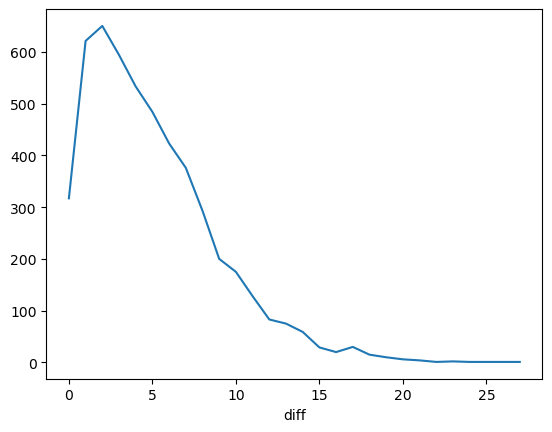

In [62]:
predictions["diff"].round().value_counts().sort_index().plot()

In [64]:
predictions

,actual,prediction,diff
DATE,,,
2010-01-12,36.0,34.631304,1.368696
2010-01-13,42.0,34.463022,7.536978
2010-01-14,50.0,43.540516,6.459484
2010-01-15,50.0,43.991562,6.008438
2010-01-16,45.0,45.811544,0.811544
...,...,...,...
2024-01-24,57.0,47.285771,9.714229
2024-01-25,45.0,51.036733,6.036733
2024-01-26,47.0,45.918345,1.081655


<Axes: xlabel='DATE'>

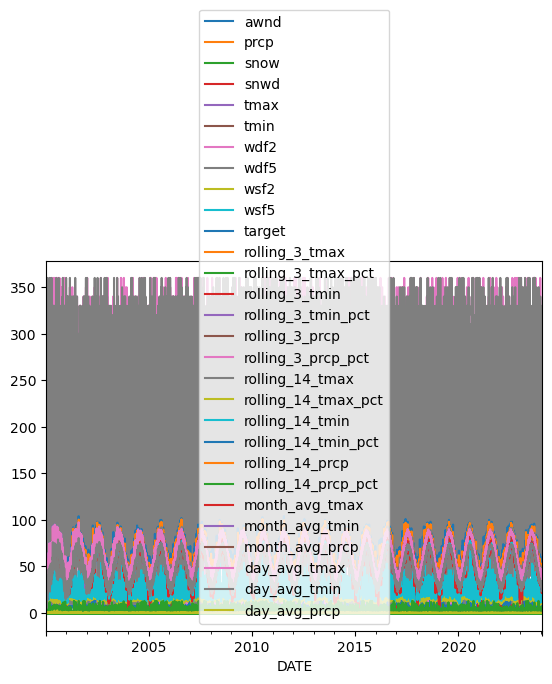

In [69]:
weather.plot()

In [70]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,month_avg_tmin,month_avg_prcp,day_avg_tmax,day_avg_tmin,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-15,USW00014732,"LAGUARDIA AIRPORT, NY US",9.17,0.00,0.0,0.0,30,18,290.0,330.0,...,33.714286,-0.466102,0.101429,-1.000000,30.000000,18.000000,0.000000,30.00,18.00,0.0000
2000-01-16,USW00014732,"LAGUARDIA AIRPORT, NY US",18.79,0.00,0.0,0.0,47,23,300.0,320.0,...,32.428571,-0.290749,0.101429,-1.000000,38.500000,20.500000,0.000000,47.00,23.00,0.0000
2000-01-17,USW00014732,"LAGUARDIA AIRPORT, NY US",24.61,0.00,0.0,0.0,23,8,310.0,280.0,...,29.642857,-0.730120,0.101429,-1.000000,33.333333,16.333333,0.000000,23.00,8.00,0.0000
2000-01-18,USW00014732,"LAGUARDIA AIRPORT, NY US",11.41,0.00,0.0,0.0,20,5,330.0,40.0,...,26.785714,-0.813333,0.050714,-1.000000,30.000000,13.500000,0.000000,20.00,5.00,0.0000
2000-01-19,USW00014732,"LAGUARDIA AIRPORT, NY US",9.17,0.00,0.0,0.0,30,11,310.0,310.0,...,25.428571,-0.567416,0.050714,-1.000000,30.000000,13.000000,0.000000,30.00,11.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,USW00014732,"LAGUARDIA AIRPORT, NY US",6.04,0.07,0.0,0.0,44,37,50.0,60.0,...,28.642857,0.291771,0.113571,-0.383648,40.066313,28.502653,0.101446,39.04,26.80,0.1488
2024-01-25,USW00014732,"LAGUARDIA AIRPORT, NY US",6.49,0.22,0.0,0.0,57,41,50.0,230.0,...,28.571429,0.435000,0.129286,0.701657,40.088742,28.519205,0.101603,39.60,27.76,0.1660
2024-01-26,USW00014732,"LAGUARDIA AIRPORT, NY US",9.62,0.21,0.0,0.0,45,40,40.0,60.0,...,28.428571,0.407035,0.140000,0.500000,40.095238,28.534392,0.101746,37.84,27.72,0.0872
